In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [4]:
df = dataset.copy()
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [6]:
print(df.head())
print(df.tail())

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  Region  
0  0.5        0       0  
1  0.4        0       0  
2  0.1        0       0  
3  0.0        0       0  
4  0.5        0       0  
     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   

In [7]:
#Droping unecesary features
df.drop(['day','month','year'], axis=1,inplace=True)

In [8]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
#Dependent and Independent variables
X = df.drop(['FWI'], axis=1)
Y = df.drop(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','Classes', 'Region'],axis=1)

In [10]:
Y.head()

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5


In [11]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train,y_test = train_test_split(X,Y, test_size=0.25)

In [12]:
print(X_train.shape, x_test.shape,Y_train.shape,y_test.shape)

(182, 11) (61, 11) (182, 1) (61, 1)


Checking Multicolinearity

<Axes: >

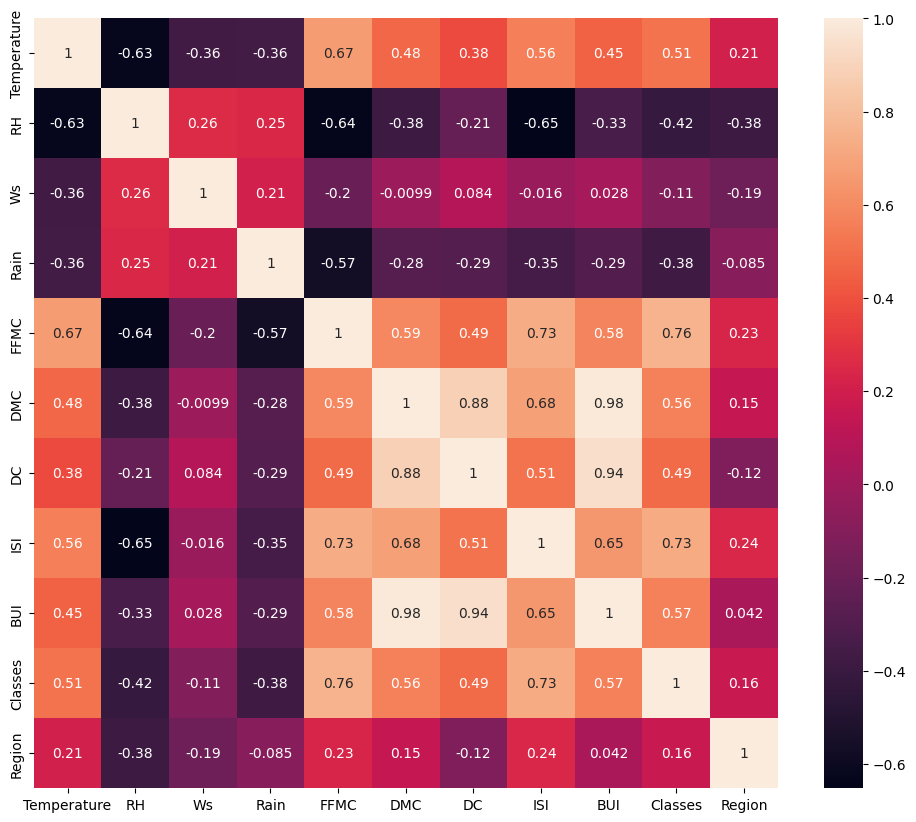

In [13]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [14]:
def correlation(dataset, threshold):
    corr_col = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[j]
                corr_col.add(colname)
    return corr_col

In [15]:
corr_features = correlation(X_train,0.85)
X_train.drop(corr_features,axis = 1, inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

Standardization

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
X_train_scaled,X_train

(array([[ 0.80697351, -0.14455448, -0.23075843, ...,  0.89170127,
          0.8660254 , -1.01105006],
        [ 0.25065086, -0.00644994, -1.99538173, ..., -0.94307387,
         -1.15470054,  0.98907071],
        [-0.02751046, -0.90412944, -1.64245707, ...,  0.53982658,
          0.8660254 , -1.01105006],
        ...,
        [ 0.25065086,  0.75312503, -1.28953241, ..., -0.99334168,
         -1.15470054, -1.01105006],
        [-0.86199443,  0.89122957,  0.12216623, ..., -0.46552965,
          0.8660254 , -1.01105006],
        [ 0.52881219, -1.24939079, -1.28953241, ...,  1.64571845,
          0.8660254 ,  0.98907071]]),
      Temperature  RH  Ws  Rain  FFMC   DMC   ISI  Classes  Region
 85            35  60  15   0.0  88.9  43.9   8.2        1       0
 139           33  62  10   8.7  65.5   4.6   0.9        0       1
 109           32  49  11   0.0  89.4   9.8   6.8        1       0
 228           33  26  13   0.0  93.9  21.2  14.2        1       1
 200           35  66  15   0.1  82.7 

Text(0.5, 1.0, 'X_train after scaling')

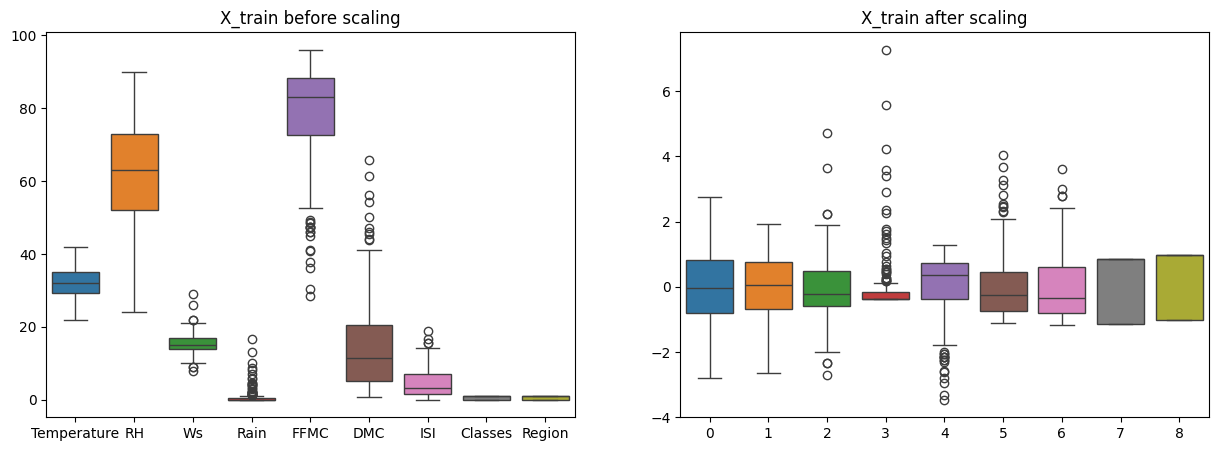

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")

## Linear Regression Model

Slope :  [[-0.05475273 -0.16786557  0.04206514 -0.06822545 -0.8670998   3.56570386
   4.62606604  0.43257326 -0.42454672]]
Intercept :  [6.95824176]
Mean Absolute Error :  0.6069732831890492
Accuracy =  98.92197420693752


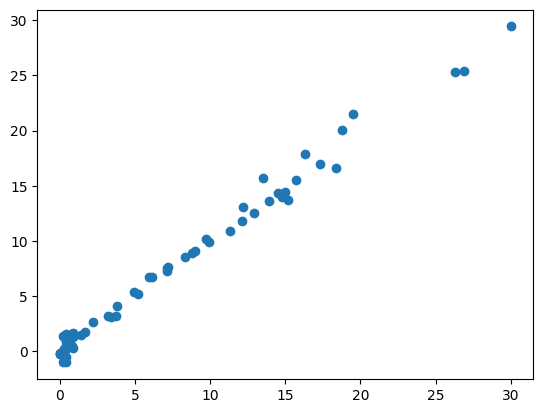

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled, Y_train)
print("Slope : ",linreg.coef_)
print("Intercept : ", linreg.intercept_)
y_pred = linreg.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ",mae)
score = r2_score(y_test, y_pred)
print("Accuracy = ",score*100)
plt.scatter(y_test, y_pred)
residuals = y_test-y_pred
# sns.kdeplot(residuals)

## Lasso Regression

Slope :  [ 0.         -0.          0.         -0.          0.          2.8665509
  3.78014353  0.         -0.        ]
Intercept :  [6.95824176]
Mean Absolute Error :  1.1187861378330153
Accuracy =  96.28436572238523


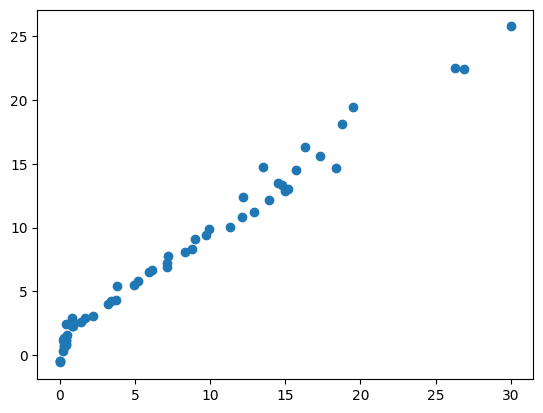

In [20]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lasso = Lasso()
lasso.fit(X_train_scaled, Y_train)
print("Slope : ",lasso.coef_)
print("Intercept : ", lasso.intercept_)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ",mae)
score = r2_score(y_test, y_pred)
print("Accuracy = ",score*100)
plt.scatter(y_test, y_pred)

## Ridge Regression

Slope :  [[-0.0491378  -0.18618734  0.05759561 -0.06331488 -0.82596292  3.55256543
   4.55015187  0.45384004 -0.4198423 ]]
Intercept :  [6.95824176]
Mean Absolute Error :  0.6191691751252725
Accuracy =  98.91964688810856


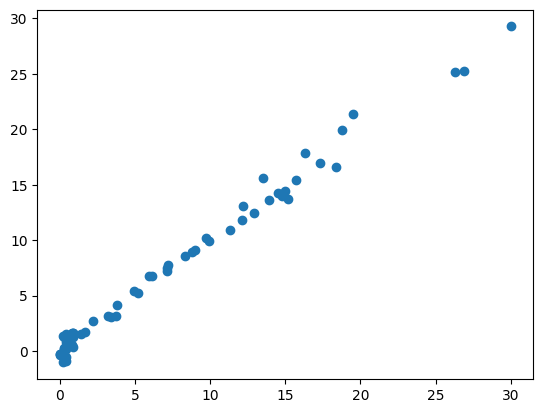

In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, Y_train)
print("Slope : ",ridge.coef_)
print("Intercept : ", ridge.intercept_)
y_pred = ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ",mae)
score = r2_score(y_test, y_pred)
print("Accuracy = ",score*100)
plt.scatter(y_test, y_pred)

## Elastic Net Regression

Slope :  [ 0.10188366 -0.29272481  0.         -0.          0.31127788  2.34839939
  2.389943    0.78333527 -0.        ]
Intercept :  [6.95824176]
Mean Absolute Error :  1.6703408866737703
Accuracy =  90.96087891980822


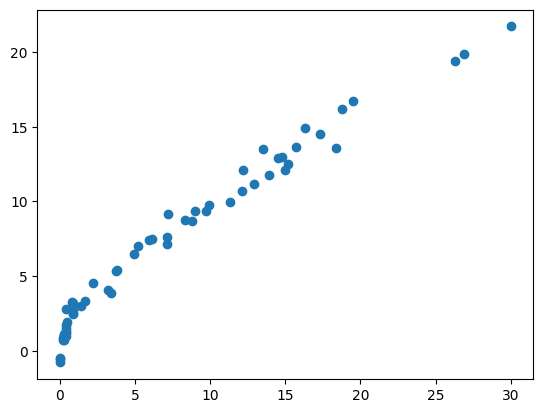

In [22]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
en = ElasticNet()
en.fit(X_train_scaled, Y_train)
print("Slope : ",en.coef_)
print("Intercept : ", en.intercept_)
y_pred = en.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ",mae)
score = r2_score(y_test, y_pred)
print("Accuracy = ",score*100)
plt.scatter(y_test, y_pred)

## LassoCV

0.9892637464543198


e:\jai\Python Workspace\Krish Naik Udemy\Python\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


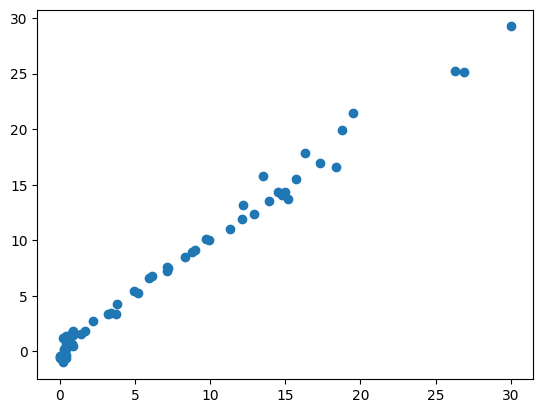

In [23]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled, Y_train)
y_pred = lassocv.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(score)

In [24]:
len(lassocv.alphas_),lassocv.alpha_

(100, np.float64(0.02909944234172239))

In [25]:
lassocv.mse_path_

array([[55.18944298, 51.49663859, 63.93538573, 43.39472584, 52.44437533],
       [49.78916539, 45.59660124, 59.52877843, 38.76923125, 48.12210445],
       [45.05530424, 40.56278737, 53.87410698, 34.42403606, 43.31691802],
       [40.90355011, 36.27578333, 48.88045132, 30.19752554, 37.70166647],
       [36.55130002, 31.86288178, 43.72979266, 26.51579629, 32.82647315],
       [32.30181285, 27.80059459, 38.69095636, 23.30804629, 28.59426485],
       [28.58554596, 24.3179375 , 34.27804071, 20.51324058, 24.92080432],
       [25.33423392, 21.33578925, 30.41221151, 18.07776295, 21.73280875],
       [22.48821291, 18.78538971, 27.02380108, 15.95512712, 18.96657454],
       [19.99666921, 16.60836814, 24.05238471, 14.10488044, 16.56680417],
       [17.8141654 , 14.75293967, 21.44528962, 12.49164839, 14.48520544],
       [15.90149219, 13.17465277, 19.15659308, 11.08516038, 12.68002673],
       [14.22447725, 11.83501892, 17.14593273,  9.85855433, 11.11490759],
       [12.75333365, 10.70072386, 15.3

### RidgeCV

0.989196468881087
1.0


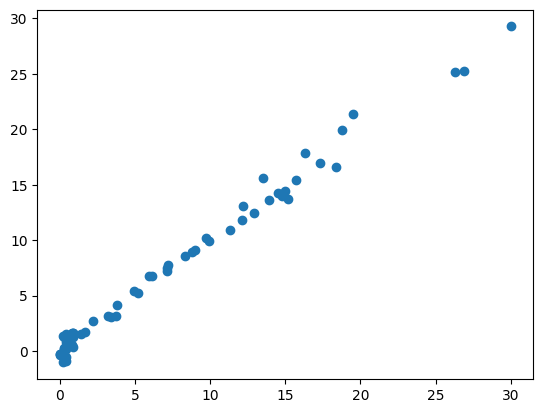

In [26]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV()
ridgecv.fit(X_train_scaled, Y_train)
y_pred = ridgecv.predict(x_test_scaled)
score = r2_score(y_test, y_pred)
print(score)
print(ridgecv.alpha_)
plt.scatter(y_test, y_pred)


## ElasticNetCV

In [27]:
from sklearn.linear_model import ElasticNetCV
enCV = ElasticNetCV()
enCV.fit(X_train_scaled, Y_train)
y_pred = enCV.predict(x_test_scaled)
score = r2_score(y_test, y_pred)
print(score)

0.9889746541277842


e:\jai\Python Workspace\Krish Naik Udemy\Python\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
scaler

StandardScaler()

In [29]:
ridgecv

RidgeCV()

In [32]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridgecv,open('ridgecv.pkl','wb'))